In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
cardata=pd.read_csv("cardata.csv")

In [3]:
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
cardata.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
cardata.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [6]:
cardata.shape

(301, 9)

In [7]:
cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


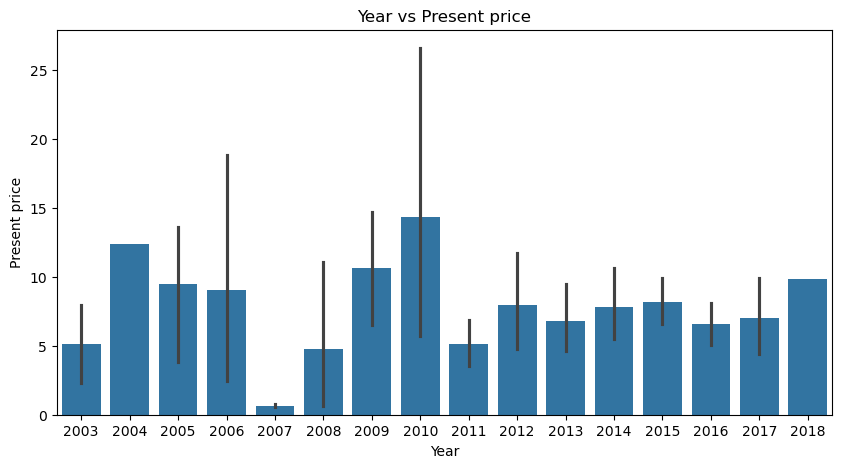

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="Year",y="Present_Price",data=cardata)
plt.title("Year vs Present price")
plt.xlabel("Year")
plt.ylabel("Present price")
plt.show()

In [10]:
cardata=cardata.drop(cardata.index[100:201])

In [11]:
cardata.shape

(200, 9)

In [12]:
cardata['Fuel_Type'].value_counts()

Fuel_Type
Petrol    138
Diesel     60
CNG         2
Name: count, dtype: int64

In [13]:
cardata.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2692\58387072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardata.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [14]:
cardata['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual      5
Name: count, dtype: int64

In [15]:
cardata.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2692\2340264816.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardata.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [16]:
cardata['Transmission'].value_counts()

Transmission
Manual       169
Automatic     31
Name: count, dtype: int64

In [17]:
cardata.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2692\117252700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardata.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [18]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       200 non-null    object 
 1   Year           200 non-null    int64  
 2   Selling_Price  200 non-null    float64
 3   Present_Price  200 non-null    float64
 4   Kms_Driven     200 non-null    int64  
 5   Fuel_Type      200 non-null    int64  
 6   Seller_Type    200 non-null    int64  
 7   Transmission   200 non-null    int64  
 8   Owner          200 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 15.6+ KB


In [19]:
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [20]:
cardata['Car_Name'].value_counts()

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
i20               9
innova            9
grand i10         8
amaze             7
jazz              7
eon               6
sx4               6
ertiga            6
alto k10          5
swift             5
i10               5
wagon r           4
ritz              4
dzire             4
etios liva        4
etios cross       3
xcent             3
creta             3
etios g           3
elantra           2
alto 800          1
800               1
s cross           1
omni              1
baleno            1
ignis             1
vitara brezza     1
corolla           1
etios gd          1
camry             1
land cruiser      1
Name: count, dtype: int64

In [21]:
cardata.to_csv('Cleaned_cardata.csv',index=False)

In [22]:
cardata['Car_Name'].value_counts()

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
i20               9
innova            9
grand i10         8
amaze             7
jazz              7
eon               6
sx4               6
ertiga            6
alto k10          5
swift             5
i10               5
wagon r           4
ritz              4
dzire             4
etios liva        4
etios cross       3
xcent             3
creta             3
etios g           3
elantra           2
alto 800          1
800               1
s cross           1
omni              1
baleno            1
ignis             1
vitara brezza     1
corolla           1
etios gd          1
camry             1
land cruiser      1
Name: count, dtype: int64

In [23]:
cardata['Car_Name'].value_counts()

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
i20               9
innova            9
grand i10         8
amaze             7
jazz              7
eon               6
sx4               6
ertiga            6
alto k10          5
swift             5
i10               5
wagon r           4
ritz              4
dzire             4
etios liva        4
etios cross       3
xcent             3
creta             3
etios g           3
elantra           2
alto 800          1
800               1
s cross           1
omni              1
baleno            1
ignis             1
vitara brezza     1
corolla           1
etios gd          1
camry             1
land cruiser      1
Name: count, dtype: int64

In [24]:
cardata.replace({'Car_Name':{'city':0,'corolla altis':1,'verna':2,'fortuner':3,'brio':4,'ciaz':5,'i20':6,'innova':7,'grand i10':8,'amaze':9,'jazz':10,'eon':11,'sx4':12,'ertiga':13,'alto k10':14,'swift':15,'i10':16,'wagon r':17,'ritz':18,'dzire':19,'etios liva':20,'etios cross':21,'xcent':22,'creta':23,'etios g':24,'elantra':25,'alto 800':26,'800':27,'s cross':28,'omni':29,'baleno':30,'ignis':31,'vitara brezza':32,'corolla':33,'etios gd':34,'camry':35,'land cruiser':36}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2692\2245701956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardata.replace({'Car_Name':{'city':0,'corolla altis':1,'verna':2,'fortuner':3,'brio':4,'ciaz':5,'i20':6,'innova':7,'grand i10':8,'amaze':9,'jazz':10,'eon':11,'sx4':12,'ertiga':13,'alto k10':14,'swift':15,'i10':16,'wagon r':17,'ritz':18,'dzire':19,'etios liva':20,'etios cross':21,'xcent':22,'creta':23,'etios g':24,'elantra':25,'alto 800':26,'800':27,'s cross':28,'omni':29,'baleno':30,'ignis':31,'vitara brezza':32,'corolla':33,'etios gd':34,'camry':35,'land cruiser':36}},inplace=True)


In [25]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       200 non-null    int64  
 1   Year           200 non-null    int64  
 2   Selling_Price  200 non-null    float64
 3   Present_Price  200 non-null    float64
 4   Kms_Driven     200 non-null    int64  
 5   Fuel_Type      200 non-null    int64  
 6   Seller_Type    200 non-null    int64  
 7   Transmission   200 non-null    int64  
 8   Owner          200 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 15.6 KB


In [26]:
correlation = cardata.corr()
correlation

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,-0.065794,-0.171513,-0.115427,0.065797,0.015752,0.148245,-0.069241,0.226919
Year,-0.065794,1.000000,0.348261,-0.059669,-0.707261,0.079224,-0.266364,0.003406,-0.152160
Selling_Price,-0.171513,0.348261,1.000000,0.825458,-0.109399,0.401031,-0.036520,0.446993,-0.084756
Present_Price,-0.115427,-0.059669,0.825458,1.000000,0.248336,0.314712,0.066585,0.417134,0.046369
Kms_Driven,0.065797,-0.707261,-0.109399,0.248336,1.000000,0.203778,0.355042,0.132346,0.197656
Fuel_Type,0.015752,0.079224,0.401031,0.314712,0.203778,1.000000,-0.039421,0.058954,-0.050367
Seller_Type,0.148245,-0.266364,-0.036520,0.066585,0.355042,-0.039421,1.000000,0.108403,0.358254
Transmission,-0.069241,0.003406,0.446993,0.417134,0.132346,0.058954,0.108403,1.000000,0.104766
Owner,0.226919,-0.152160,-0.084756,0.046369,0.197656,-0.050367,0.358254,0.104766,1.000000


<Axes: >

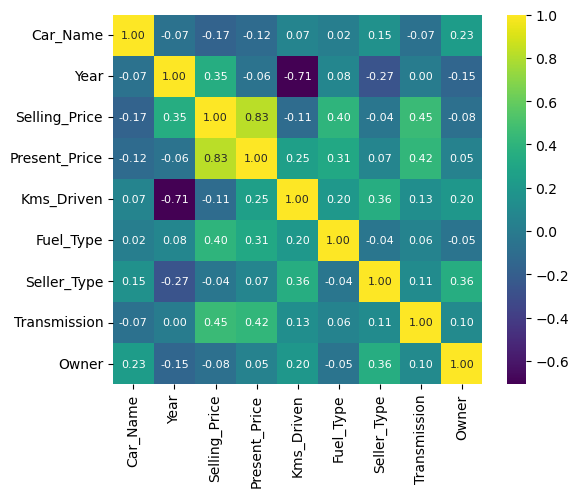

In [27]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='viridis')

In [28]:
x=cardata.drop('Selling_Price',axis=1)
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,18,2014,5.59,27000,0,0,0,0
1,12,2013,9.54,43000,1,0,0,0
2,5,2017,9.85,6900,0,0,0,0
3,17,2011,4.15,5200,0,0,0,0
4,15,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,0,2016,11.60,33988,1,0,0,0
297,4,2015,5.90,60000,0,0,0,0
298,0,2009,11.00,87934,0,0,0,0
299,0,2017,12.50,9000,1,0,0,0


In [29]:
y=cardata['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 200, dtype: float64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
x.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape,y.shape

((200, 8), (140, 8), (60, 8), (140,), (60,), (200,))

In [32]:
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
training_data_predict=model.predict(x_train)
training_data_accuracy=metrics.r2_score(training_data_predict,y_train)
print('accuracy of training data:',training_data_accuracy)


accuracy of training data: 0.8750377988183176


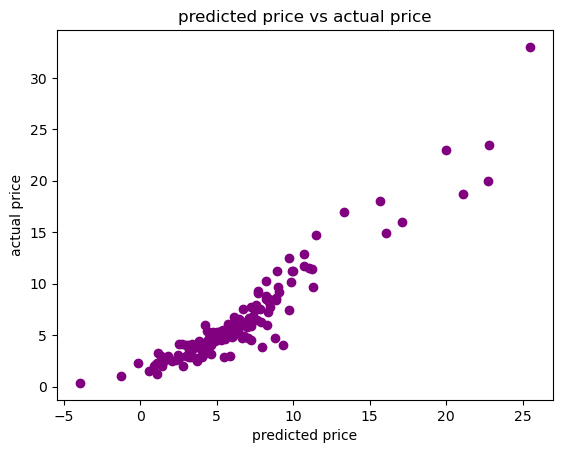

In [41]:
plt.scatter(training_data_predict,y_train,color='purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [42]:
testing_data_predict=model.predict(x_test)
testing_data_accuracy=metrics.r2_score(testing_data_predict,y_test)
print('accuracy of testing data:',testing_data_accuracy)


accuracy of testing data: 0.8422011058789481


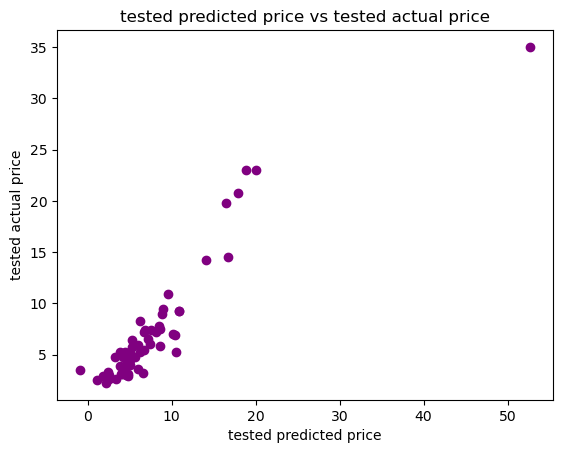

In [43]:
plt.scatter(testing_data_predict,y_test,color='purple')
plt.xlabel('tested predicted price')
plt.ylabel('tested actual price')
plt.title('tested predicted price vs tested actual price')
plt.show()

In [46]:
input_data=(18,	2014,	5.59,	27000,	0,	0,	0,	0)
input_data_as_np=np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print('predicted price of car',prediction[0])

predicted price of car 4.225017216787251


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
input_data=(17,	2011,	4.15,	5200,	0,	0,	0,	0)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print('predicted price of car',prediction[0])

predicted price of car 3.1945207278754424


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
